In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, ttest_ind, chisquare, chi2_contingency
from scikit_posthocs import posthoc_dunn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import f_oneway
import scikit_posthocs

In [2]:
data = pd.read_csv("yulu.csv")

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.shape
# There are 12 columns and 10886 datapoints in the dataset.

(10886, 12)

In [5]:
data.info()
# Column datetime should be of datatype datetime.
# Columns season, holiday, working day, weather are categorical variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["season"] = data["season"].astype(str)
data["workingday"] = data["workingday"].astype(str)
data["weather"] = data["weather"].astype(str)
data["holiday"] = data["holiday"].astype(str)
data.info()
# The datatypes of the columns have been updated.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [7]:
# As can be seen, there are no missing values in the dataset.
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month
data["weekday"] = data["datetime"].dt.day_name()
data["hour"] = data["datetime"].dt.hour
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,Wednesday,22


In [9]:
data.describe()
# The minimum temperature recorded is 0.82 and maximum is 41.
# The minimum humidity is 0 and maximum is 100
# The minimum windspeed is 0 and maximum is 56.99. 
# The minimum ride count booked at a particular hour is 1 and maximum is 977. The mean ride count is 191.5 whereas median is 145.
# This means the ride count distribution across hours is right skewed.

,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,11.541613
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,6.915838
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,6.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,12.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,18.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,23.000000


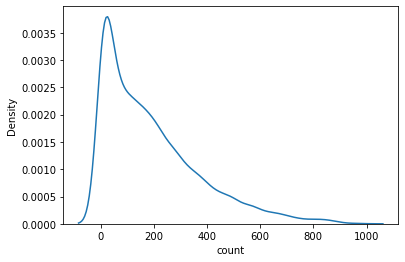

In [10]:
# The ride count distribution across hours is right skewed.
sns.distplot(data["count"], hist = False)
plt.show()

In [11]:
data["season"].value_counts()
# 2734 hours in the dataset were in season 4, 2733 in season 2, 2733 in season 3 and 2686 in season 1.

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [12]:
data["weather"].value_counts()
# 7192 hours in the dataset were in weather 1, 2834 in weather 2, 859 in weather 3 and 1 in weather 4.

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [13]:
data.corr()

,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.145430
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.140343
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.278011
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.146631
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.302045
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.380540
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403,0.166862,0.400601
year,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403,1.000000,-0.004932,-0.004234
month,0.257589,0.264173,0.204537,-0.150192,0.092722,0.169451,0.166862,-0.004932,1.000000,-0.006818
hour,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601,-0.004234,-0.006818,1.000000


<AxesSubplot:>

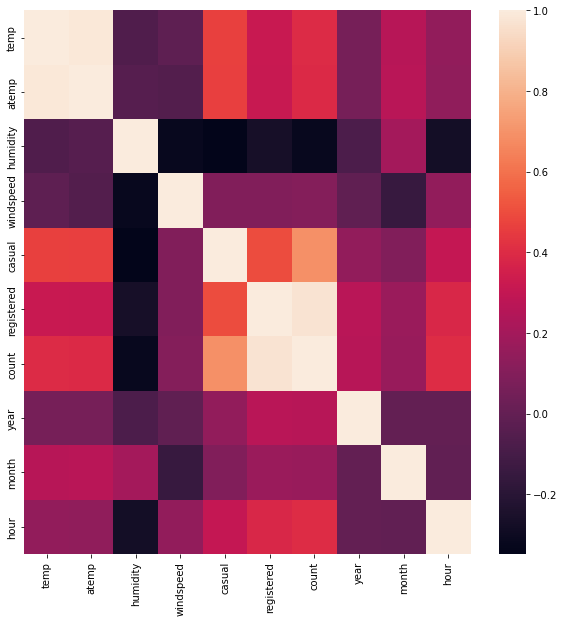

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr())
# As can be seen from heatmap below, variable temp and atemp are highly correlated.
# Variables registered and count are also highly correlated.
# Columns atemp and registerd can be dropped. 

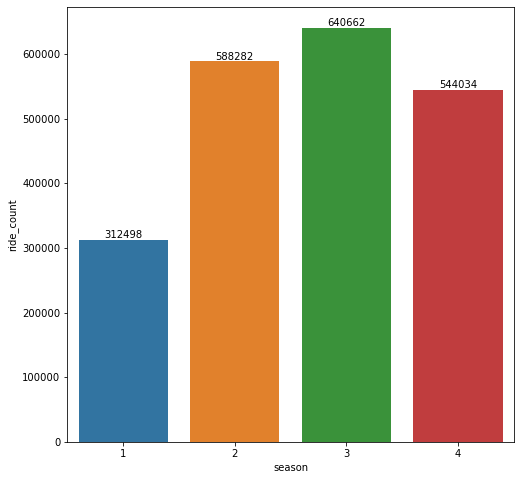

In [15]:
# Understanding the distribution of ride counts in different weather conditions
sea_ride = data.groupby("season").aggregate(ride_count = ("count", "sum")).reset_index()
plt.figure(figsize = (8,8))
ax = sns.barplot(x = sea_ride["season"], y = sea_ride["ride_count"])
plt.bar_label(container= ax.containers[0])
plt.show()
# As can be seen, maximum no. of rides were booked in season 3, followed by 2, 4 and 1.

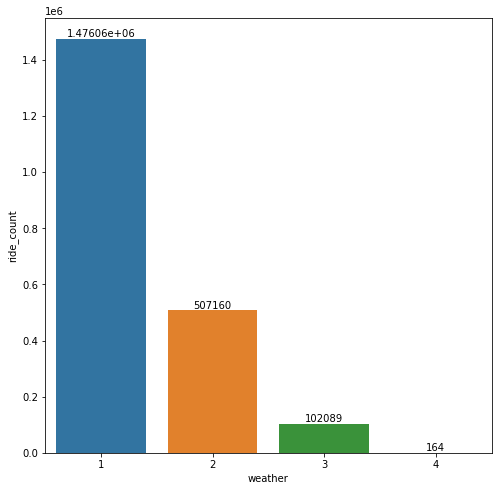

In [16]:
# Understanding the distribution of ride counts in different weather
wea_ride = data.groupby("weather").aggregate(ride_count = ("count", "sum")).reset_index()
plt.figure(figsize = (8,8))
ax = sns.barplot(x = wea_ride["weather"], y = wea_ride["ride_count"])
plt.bar_label(container= ax.containers[0])
plt.show()
# As can be seen, maximum no. of rides were booked when the weather condition was 1, followed by 2, 3 and 4.

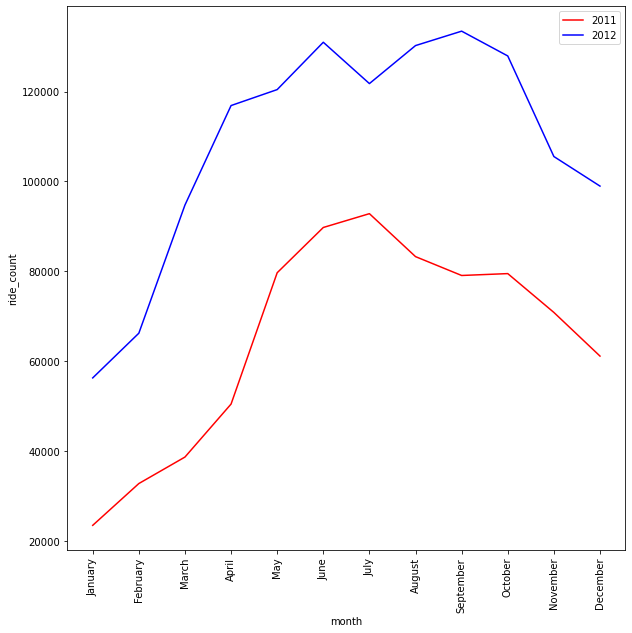

In [17]:
# Analyzing the ride counts booked month wise for the years 2011 and 2012.
year_month_data = data.groupby(["year", "month"]).aggregate(ride_count = ("count", "sum")).reset_index().sort_values(by = "month")                                                                          
plt.figure(figsize = (10,10))
sns.lineplot(x = year_month_data["month"],  y = year_month_data["ride_count"],\
             hue = year_month_data["year"], palette=  ['r','b'])
plt.legend()
plt.xticks(ticks = year_month_data["month"].sort_values().unique(), labels = data["datetime"].dt.month_name().unique(), rotation = 90)
plt.show()
# The ride count has increased from 2011 to 2012 across all the months.
# In the year 2012, after a small dip in ride count from June to July, the rides started increasing till September and then 
# started decreasing. Yulu has done exceedingly will in maintaining the upward ride counts during months August to September
# as a similar dip was found in the year 2011 and the ride counts declined continuously.

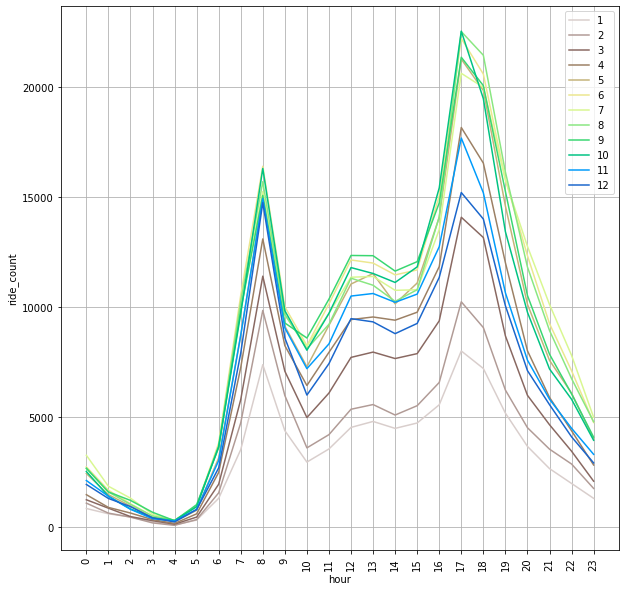

In [18]:
# Analyzing the ride counts at different hours across all months.
month_hour_data = data.groupby(["month", "hour"]).aggregate(ride_count = ("count", "sum")).reset_index().\
sort_values(["month","hour"])
plt.figure(figsize = (10,10))
current_palette = sns.color_palette("terrain_r", 12) 
sns.lineplot(x = month_hour_data["hour"], y = month_hour_data["ride_count"], hue = month_hour_data["month"],\
             palette= current_palette )
plt.legend()
plt.xticks(range(24), rotation = 90)
plt.grid()
plt.show()
# There are two peak hours during which demand for ride increases. One at 17 and 18 hrs and the other at 8 hrs. This is relatable
# to people going in the office and leaving from office.
# The demand for cabs start increasing at 15 hrs and remains high till 18 hrs. 

### Analyzing if there any significant difference between the no. of bike rides on Weekdays and Weekends

In [19]:
# Creating a column for categorizing weekday as 1 and weekends as 0
def day_class(x):
    if x in ["Saturday", "Sunday"]:
        return "Weekend"
    return "Weekday"

In [20]:
date_ride_count = data.groupby(data["datetime"].dt.date).aggregate(count = ("count", "sum")).reset_index()
date_ride_count["datetime"] = pd.to_datetime(date_ride_count["datetime"])
date_ride_count["weekday"] = date_ride_count["datetime"].dt.day_name().transform(day_class)
date_ride_count

,datetime,count,weekday
0,2011-01-01,985,Weekend
1,2011-01-02,801,Weekend
2,2011-01-03,1349,Weekday
3,2011-01-04,1562,Weekday
4,2011-01-05,1600,Weekday
...,...,...,...
451,2012-12-15,5047,Weekend
452,2012-12-16,3786,Weekend
453,2012-12-17,4585,Weekday
454,2012-12-18,5557,Weekday


In [21]:
# (Null Hypothesis) H0: The average ride counts booked on weekday and weekends are equal.
# (Alternate Hypothese) Ha: The average ride counts booked on weekday and weekends are not equal

# Test method: 2 sample T test.

# Level of significance  alpha = 0.05

In [22]:
# Validating the assumptions of T test:
# The ride counts are independent of each other.
# The ride counts are discrete in the sense thta they are integers and cannot be decimals but here we consider it as continuous.

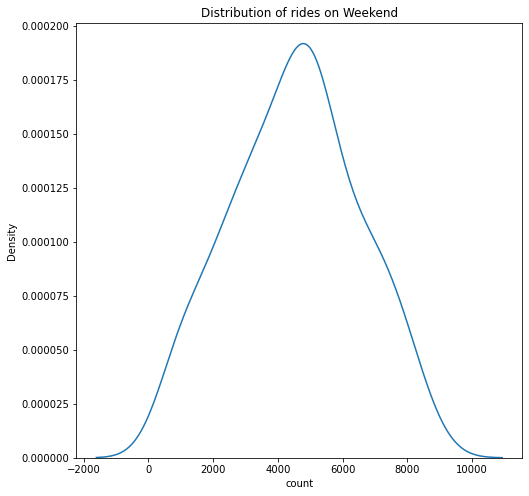

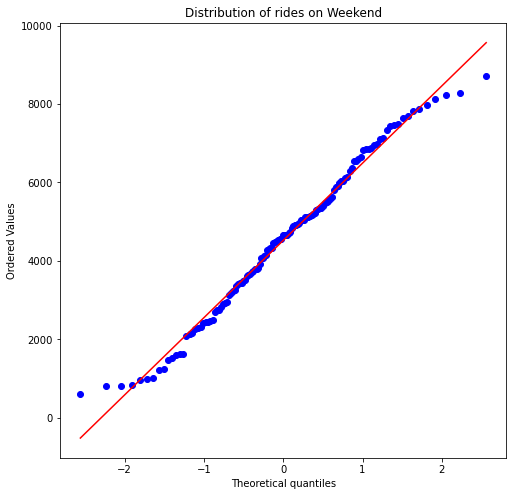

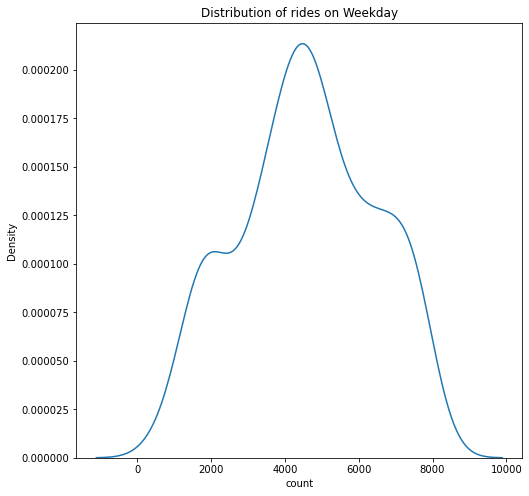

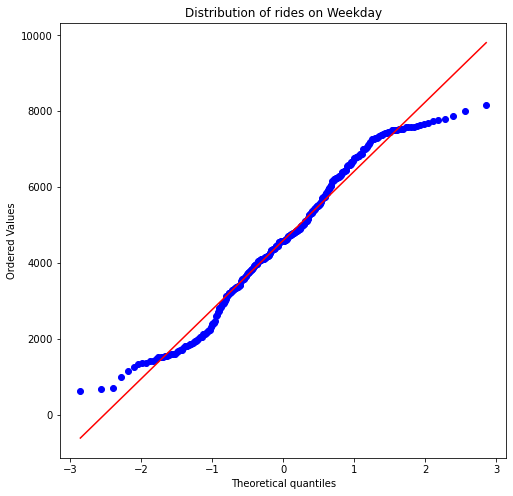

In [23]:
# Analyzing the distribution of ride counts using kde and qq plot
for i in date_ride_count["weekday"].unique():
    plt.figure(figsize = (8,8))
    sns.distplot(date_ride_count.loc[date_ride_count["weekday"] == i,"count"], hist = False)
    plt.title(f"Distribution of rides on {i}")
    plt.show()
    plt.figure(figsize = (8,8))
    stats.probplot(date_ride_count.loc[date_ride_count["weekday"] == i,"count"], dist= "norm", plot=pylab)
    plt.title(f"Distribution of rides on {i}")     
    pylab.show()
# The ride counts on weekends are approximately normally distributed on weekend but not on weekdays.

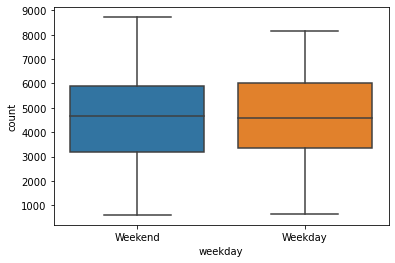

In [24]:
plt.figure()
sns.boxplot(x = date_ride_count["weekday"], y = date_ride_count["count"])
plt.show()
# There are no outliers in ride count for both weekdays and weekends.

In [25]:
# Conducting Shapiro test for Normality
for i in date_ride_count["weekday"].unique():
    print(f"Null Hypothesis H0: The ride count on {i} comes from normally distributed population")
    print("Alternate Hypothesis Ha: The ride count on {i} does not come from Normally distributed population")
    print()
    print("Level of Significance alpha = 0.05")
    print()
    stats, p_value = shapiro(date_ride_count.loc[date_ride_count["weekday"] == i,"count"])
    if p_value < 0.05:
        print(f"As p value is less than 0.05, we reject null hypothesis, the ride count on {i} does not come from Normally distributed population")
    else:
        print(f"As p value is greater than 0.05, we fail to reject null hypothesis, the ride count on {i} comes from Normally distributed population") 
    print('*'*100)

Null Hypothesis H0: The ride count on Weekend comes from normally distributed population
Alternate Hypothesis Ha: The ride count on {i} does not come from Normally distributed population

Level of Significance alpha = 0.05

As p value is greater than 0.05, we fail to reject null hypothesis, the ride count on Weekend comes from Normally distributed population
****************************************************************************************************
Null Hypothesis H0: The ride count on Weekday comes from normally distributed population
Alternate Hypothesis Ha: The ride count on {i} does not come from Normally distributed population

Level of Significance alpha = 0.05

As p value is less than 0.05, we reject null hypothesis, the ride count on Weekday does not come from Normally distributed population
****************************************************************************************************


In [26]:
# Even though rid count on weekday is not normally distributed, we will continue with independent T test for 2 samples as 
# sample size is large.

In [27]:
# Conducting Levene test for eqality of variance for ride counts on weekdays and weekends
ride_weekend = date_ride_count.loc[date_ride_count["weekday"] == "Weekend","count"]
ride_weekday = date_ride_count.loc[date_ride_count["weekday"] == "Weekday","count"]
levene(ride_weekend, ride_weekday)
# As p value is greater than 0.05, we fail to reject Null Hypothesis. The varianc of ride counts on weekdays and weekends are 
# equal.

LeveneResult(statistic=0.6463648788817921, pvalue=0.4218360924461294)

In [28]:
ttest_ind(ride_weekend, ride_weekday)
# As p-value is greater than 0.05, we fail to reject the null hypothesis.
# The average ride counts on weekends and weekdays are equal.

Ttest_indResult(statistic=-0.3657962794180527, pvalue=0.7146874742951812)

### Analyzing if the demand of bicycles on rent is the same for different Weather conditions

In [29]:
# Understanding the amount of data available for different weather conditions
data["weather"].value_counts()
# As there is one record for weather condition 4, it will not be considered in our analysis due to data insufficiency.

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

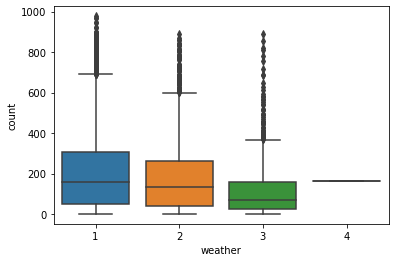

In [30]:
# Trying to understand the outliers in ride count for different weather counts.
plt.figure()
sns.boxplot(y = data["count"], x = data["weather"])
plt.show()
# As can be seen, there are many outliers in the dataset. 

In [31]:
# Removing the outliers from the above the data.
weather_ride_data = data.loc[data["weather"].isin(['1','2','3']),::]
weather = []
ride_count_data = []
for i in weather_ride_data["weather"].unique():
    weather.append(i)
    per_25, per_75 = np.quantile(weather_ride_data.loc[weather_ride_data["weather"] == i,"count"], [0.25,0.75])
    IQR = per_75-per_25
    weather_ride_data1 = weather_ride_data.loc[weather_ride_data["weather"] == i,"count"]
    ride_count_data.append(weather_ride_data1[(weather_ride_data1 > (per_25-1.5*IQR)) & (weather_ride_data1\
                                                 < (per_75 + 1.5*IQR))].values)
weather_ride_count = pd.DataFrame(list(zip(weather, ride_count_data)),columns = ["weather", "ride_count"])
weather_ride_count

,weather,ride_count
0,1,"[16, 40, 32, 13, 1, 2, 3, 8, 14, 36, 56, 84, 6..."
1,2,"[1, 94, 106, 110, 93, 67, 36, 34, 28, 39, 17, ..."
2,3,"[35, 37, 2, 8, 59, 74, 76, 5, 7, 1, 15, 20, 95..."


In [32]:
# Null Hypothesis H0: The mean value of ride counts in all weather conditions are equal.
# Alternate Hypothesis Ha: The mean value of ride counts in all weather conditions are not equal.

# Test method: ANOVA

# level of significance alpha = 0.05

In [33]:
# Validating the assumptions of ANOVA 
# The ride counts in a day and in different weather conditions are independent of each other.

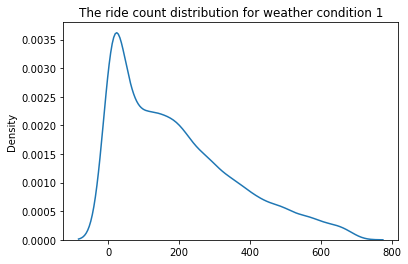

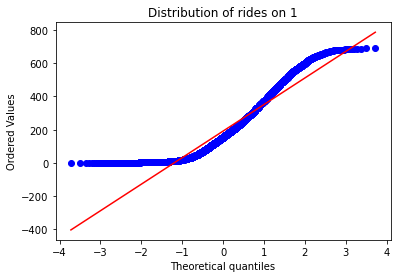

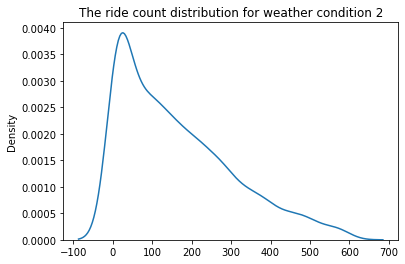

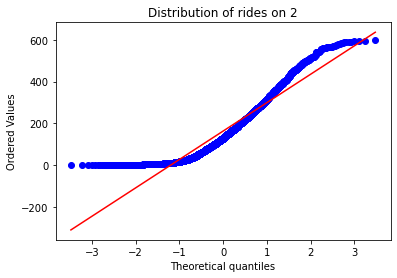

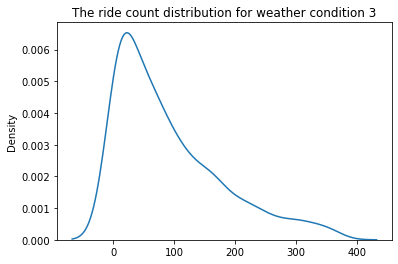

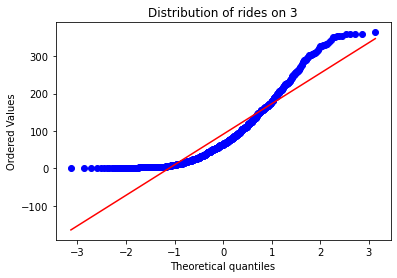

In [34]:
# Validating if samples are drawn from a Normal Population
import scipy.stats as stats
for i in weather_ride_count["weather"].unique():
    plt.figure()
    sns.distplot(weather_ride_count.loc[weather_ride_count["weather"] == i, "ride_count"].reset_index(drop = True)[0],\
                 hist = False)
    plt.title(f"The ride count distribution for weather condition {i}")
    plt.show()
    stats.probplot(weather_ride_count.loc[weather_ride_count["weather"] == i, "ride_count"].reset_index(drop = True)[0],\
                    dist= "norm", plot=pylab)
    plt.title(f"Distribution of rides on {i}")     
    pylab.show()
# As can be seen, the distribution of ride counts in different weather conditions is not normal but right skewed.

In [35]:
# Validating if ride counts in different weather conditions come from Normal distribution using Shapiro Test for Normality.
for i in weather_ride_count["weather"].unique():
    print(f"Null Hypothesis H0: The ride count distribution in weather condition {i} comes from Normally distributed population")
    print(f"Alternate Hypothesis Ha: The ride count distribution in weather condition {i} is not from Normally distributed population" )
    print()
    print("Test method: Shapiro Wilk test")
    print()
    print("Level of significance alpha: 0.05")
    print()
    stats, p_value = shapiro(weather_ride_count.loc[weather_ride_count["weather"] == i, "ride_count"].\
                             reset_index(drop = True)[0])
    if p_value < 0.05:
        print(f"As p_value is less than 0.05, we reject Null Hypothesis, ride count distribution in weather {i} does not come from Normally Distributed Population")
    else:
        print(f"As p_value is less than 0.05, we fail to reject Null Hypothesis, ride count distribution in weather {i} come from Normally Distributed Population")
    print('*'*25)
# As per Shapiro Wilk test, the ride count distribution in different weather conditions is not from Normal population.  

Null Hypothesis H0: The ride count distribution in weather condition 1 comes from Normally distributed population
Alternate Hypothesis Ha: The ride count distribution in weather condition 1 is not from Normally distributed population

Test method: Shapiro Wilk test

Level of significance alpha: 0.05

As p_value is less than 0.05, we reject Null Hypothesis, ride count distribution in weather 1 does not come from Normally Distributed Population
*************************
Null Hypothesis H0: The ride count distribution in weather condition 2 comes from Normally distributed population
Alternate Hypothesis Ha: The ride count distribution in weather condition 2 is not from Normally distributed population

Test method: Shapiro Wilk test

Level of significance alpha: 0.05

As p_value is less than 0.05, we reject Null Hypothesis, ride count distribution in weather 2 does not come from Normally Distributed Population
*************************
Null Hypothesis H0: The ride count distribution in wea

In [36]:
# Validating if variance of ride counts in different weather conditions are equal.
print("Null Hypothesis H0: The variance of ride count distribution in different weather conditions are equal")
print(f"Alternate Hypothesis Ha: The variance of ride count distribution in different weather conditions are not equal" )
print()
print("Test method: Levene test")
print()
print("Level of significance alpha: 0.05")
print()
ride_weather_1 = weather_ride_count.loc[weather_ride_count["weather"] == '1', "ride_count"].reset_index(drop = True)[0] 
ride_weather_2 = weather_ride_count.loc[weather_ride_count["weather"] == '2', "ride_count"].reset_index(drop = True)[0]
ride_weather_3 = weather_ride_count.loc[weather_ride_count["weather"] == '3', "ride_count"].reset_index(drop = True)[0]
stats, p_value = levene(ride_weather_1, ride_weather_2, ride_weather_3)
if p_value < 0.05:
    print(f"As p_value is less than 0.05, we reject Null Hypothesis. Therefore, The variance of ride count distribution in different weather conditions are not equal")
else:
    print(f"As p_value is less than 0.05, we fail to reject Null Hypothesis. Therefore, The variance of ride count distribution in different weather conditions are not equal")
print('*'*25)  

Null Hypothesis H0: The variance of ride count distribution in different weather conditions are equal
Alternate Hypothesis Ha: The variance of ride count distribution in different weather conditions are not equal

Test method: Levene test

Level of significance alpha: 0.05

As p_value is less than 0.05, we reject Null Hypothesis. Therefore, The variance of ride count distribution in different weather conditions are not equal
*************************


In [37]:
# Thus the conditions of samples from Normal Populations and equality in variances of all groups are not met. 
# Hence, we should use a Kruskal Walis  non parametric test instead of ANOVA. But we will also carry out ANOVA.
# ANOVA test for validating equality of means of ride counts in different weather conditions.
f_oneway(ride_weather_1, ride_weather_2, ride_weather_3)
# As p-value is less than 0.05 for one way ANOVA, posthoc analysis needs to be done to identify significanly different means for
# different group pairs.

F_onewayResult(statistic=162.9056065738177, pvalue=2.0801584856212998e-70)

In [38]:
# Tukeys post hoc analysis for identifying group pairs having significantly different mean.
scikit_posthocs.posthoc_tukey([ride_weather_1, ride_weather_2, ride_weather_3])
# As p value is less than 0.05 for all  group comparisions 1-2 (0.001), 2-3 (0.001) and 1-3(0.001), hence we can conclude than 
# the means of ride counts in all weather conditions are significantly different from each other.

,1,2,3
1,1.000,0.001,0.001
2,0.001,1.000,0.001
3,0.001,0.001,1.000


In [39]:
# Kruskal Walis test should be used above as the assumptions of ANOVA are not met. 
# Null Hypothesis H0: Median for ride counts in all weather conditions are equal
# Alternate Hypothesis Ha: Median for ride counts in all weather conditions are not equal.

# Test Method: Krushkal Analysis

# Level of significance alpha: 0.05

In [40]:
# Validating the assumptions of Krushkal Wallis test
# Data are assumed to be non-Normal or take a skewed distribution. One-way ANOVA should be used when data follow a 
# Normal distribution.
# The variable of interest should have two or more independent groups. The test is most commonly used in the analysis of
# three or more groups – for analyzing two groups the Mann-Whitney U test should be used instead.
# The data are assumed to take a similar distribution across the groups.
# The data should be randomly selected independent samples, in that the groups should have no relationship to each other.
# Each group sample should have at least 5 observations for a sufficient sample size.

# All these assumptions of Krushkal Wallis are met.

In [41]:
kruskal(ride_weather_1, ride_weather_2, ride_weather_3)
# As p-value for the krushkal walis test is less than 0.05, we reject the Null Hypothesis. Hence, the median for ride counts
# in all weather conditions are not equal.
# Post hoc analysis needs to be done to identify groups which are significantly different.

KruskalResult(statistic=282.3300800398698, pvalue=4.929491041445248e-62)

In [42]:
# Dunn's posthoc analysis
posthoc_dunn([ride_weather_1, ride_weather_2, ride_weather_3], p_adjust = 'bonferroni')
# As p value is less than 0.05 for all  group comparisions 1-2, 2-3 and 1-3, hence we can conclude that the median of ride 
# counts in all weather conditions are significantly different from each other.

,1,2,3
1,1.000000e+00,3.340098e-09,1.920468e-60
2,3.340098e-09,1.000000e+00,4.660359e-32
3,1.920468e-60,4.660359e-32,1.000000e+00


### Analyzing if the demand of bicycles on rent is the same for different Seasons

In [43]:
season_data = data.groupby([data["datetime"].dt.date, "season"]).aggregate(ride_count = ("count", "sum")).reset_index()
season_data

,datetime,season,ride_count
0,2011-01-01,1,985
1,2011-01-02,1,801
2,2011-01-03,1,1349
3,2011-01-04,1,1562
4,2011-01-05,1,1600
...,...,...,...
451,2012-12-15,4,5047
452,2012-12-16,4,3786
453,2012-12-17,4,4585
454,2012-12-18,4,5557


In [44]:
season_data = data.groupby([data["datetime"].dt.date, "season"]).aggregate(ride_count = ("count", "sum")).reset_index()
season_data["season"].value_counts()
# As can be seen from the data, there is sufficient data for ride counts in all the seasons.

1    114
2    114
3    114
4    114
Name: season, dtype: int64

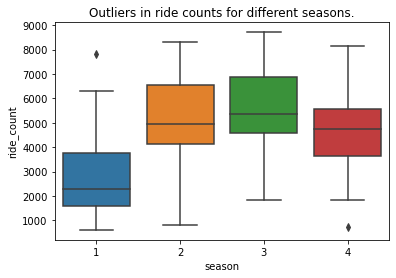

In [45]:
plt.figure()
sns.boxplot(x = season_data["season"], y= season_data["ride_count"])
plt.title("Outliers in ride counts for different seasons.")
plt.show()
# There are few outliers in ride counts in seasons 1 and 4.
# The median ride counts in season 1 is less compared to seasons 2,3 and 4.

In [46]:
# Getting the outlier counts in all seasons
season = []
outlier_ride_count = []
for i in data["season"].unique():
    season.append(i)    
    season_ride =  season_data.loc[season_data["season"] == i, "ride_count"].reset_index(drop = True)
    per_25, per_75 = np.quantile(season_ride, [0.25,0.75])
    IQR = per_75 - per_25
    outlier_ride_count.append(season_ride[(season_ride < (per_25 - 1.5*IQR)) | (season_ride > (per_75 + 1.5*IQR))].count())
pd.DataFrame(list(zip(season, outlier_ride_count)), columns = ["season", "outlier count"])
# As can be seen, there is only one outlier for different days in seasons. It would not have much impact. Hence, ANOVA analysis
# can be done for comparing the mean of ride counts in different seasons.

,season,outlier count
0,1,1
1,2,0
2,3,0
3,4,1


In [47]:
# Null Hypothesis H0: The average ride counts on a day in all seasons is same.
# Alternate Hypothesis Ha: The average ride count on a day in all seasons is not equal.

# Test Method: ANOVA

# Level of significance alpha: 0.05

In [48]:
# Validating the assumptions of ANOVA:
# The ride counts in a day in different seasons are independent of each other.

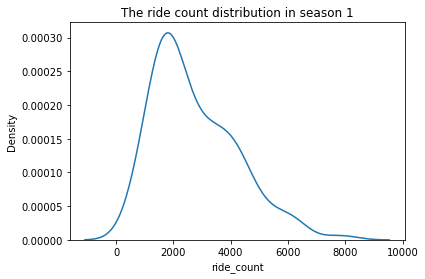

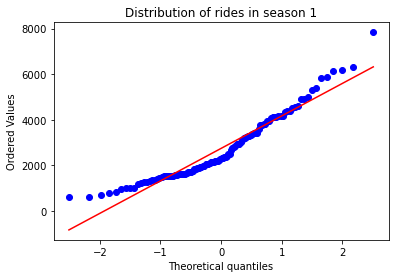

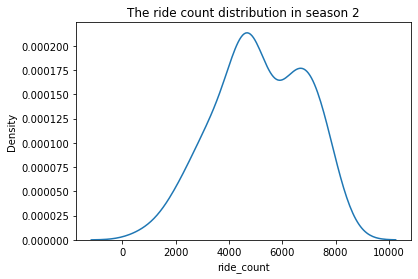

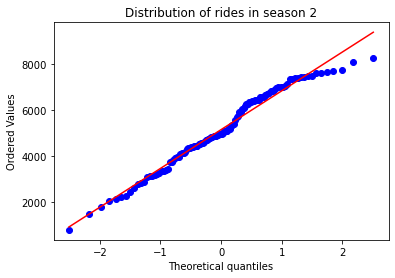

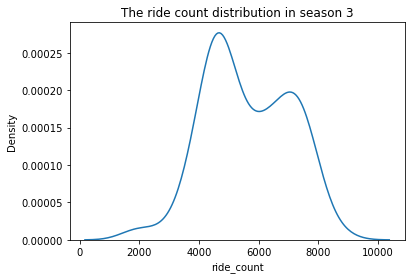

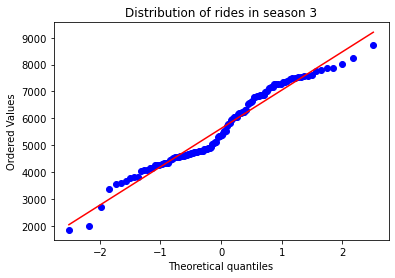

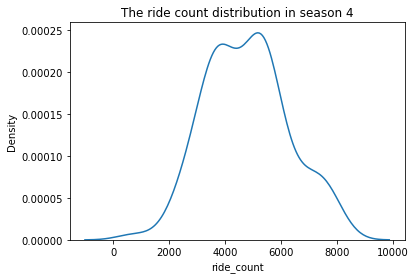

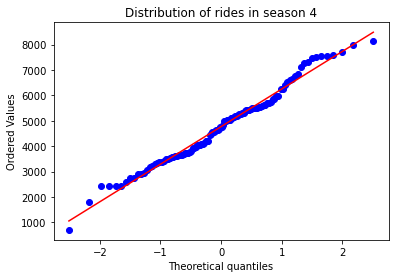

In [49]:
# Validating if samples are drawn from a Normal Population
import scipy.stats as stats
for i in season_data["season"].unique():
    plt.figure()
    sns.distplot(season_data.loc[season_data["season"] == i, "ride_count"],hist = False)
    plt.title(f"The ride count distribution in season {i}")
    plt.show()
    stats.probplot(season_data.loc[season_data["season"] == i, "ride_count"],dist= "norm", plot=pylab)
    plt.title(f"Distribution of rides in season {i}")     
    pylab.show()
# As can be seen, the distribution of ride counts in different seasons is right skewed in season 1 and little left skewed in 
# other seasons.

In [50]:
# Validating if ride counts in different seasons come from Normal distribution using Shapiro Test for Normality.
for i in season_data["season"].unique():
    print(f"Null Hypothesis H0: The ride count distribution in season {i} comes from Normally distributed population")
    print(f"Alternate Hypothesis Ha: The ride count distribution in season {i} is not from Normally distributed population" )
    print()
    print("Test method: Shapiro Wilk test")
    print()
    print("Level of significance alpha: 0.05")
    print()
    stats, p_value = shapiro(season_data.loc[season_data["season"] == i, "ride_count"])
    print(f"statistic : {stats}, p value : {p_value}")
    print()
    if p_value < 0.05:
        print(f"As p_value is less than 0.05, we reject Null Hypothesis, ride count distribution in season {i} does not come from Normally Distributed Population")
    else:
        print(f"As p_value is less than 0.05, we fail to reject Null Hypothesis, ride count distribution in season {i} come from Normally Distributed Population")
    print('*'*75)
# As per Shapiro Wilk test, the ride count distribution in seasons 1,2,3 is not from Normal population. The ride count 
# distribution is from a Normal distribution for season 4. 

Null Hypothesis H0: The ride count distribution in season 1 comes from Normally distributed population
Alternate Hypothesis Ha: The ride count distribution in season 1 is not from Normally distributed population

Test method: Shapiro Wilk test

Level of significance alpha: 0.05

statistic : 0.9294025301933289, p value : 1.4321534763439558e-05

As p_value is less than 0.05, we reject Null Hypothesis, ride count distribution in season 1 does not come from Normally Distributed Population
***************************************************************************
Null Hypothesis H0: The ride count distribution in season 2 comes from Normally distributed population
Alternate Hypothesis Ha: The ride count distribution in season 2 is not from Normally distributed population

Test method: Shapiro Wilk test

Level of significance alpha: 0.05

statistic : 0.9752593040466309, p value : 0.03278882056474686

As p_value is less than 0.05, we reject Null Hypothesis, ride count distribution in season 

In [51]:
# Validating if variance of ride counts in different seasons are equal.
print("Null Hypothesis H0: The variance of ride count distribution in different seasons are equal")
print(f"Alternate Hypothesis Ha: The variance of ride count distribution in different seasons are not equal" )
print()
print("Test method: Levene test")
print()
print("Level of significance alpha: 0.05")
print()
season1 = season_data.loc[season_data["season"] == '1', "ride_count"].values
season2 = season_data.loc[season_data["season"] == '2', "ride_count"].values
season3 = season_data.loc[season_data["season"] == '3', "ride_count"].values
season4 = season_data.loc[season_data["season"] == '4', "ride_count"].values
stats, p_value = levene(season1, season2, season3, season4)
if p_value < 0.05:
    print(f"As p_value is less than 0.05, we reject Null Hypothesis. Therefore, The variance of ride count distribution in different weather conditions are not equal")
else:
    print(f"As p_value is greater than 0.05, we fail to reject Null Hypothesis. Therefore, The variance of ride count distribution in different weather conditions is equal")
print('*'*25) 
# The variance of ride counts across different seasons is equal.

Null Hypothesis H0: The variance of ride count distribution in different seasons are equal
Alternate Hypothesis Ha: The variance of ride count distribution in different seasons are not equal

Test method: Levene test

Level of significance alpha: 0.05

As p_value is greater than 0.05, we fail to reject Null Hypothesis. Therefore, The variance of ride count distribution in different weather conditions is equal
*************************


In [52]:
# As the data is not normally distributed, we  can use Kruskal Walis test for comparing the medians od ride counts on different 
# days in different seasons.
# Validating thr assumptions of Kruskal Walis Test
# Data are assumed to be non-Normal or take a skewed distribution. 
# One-way ANOVA should be used when data follow a Normal distribution.
# The variable of interest should have two or more independent groups. The test is most commonly used in the analysis of three 
# or more groups – for analyzing two groups the Mann-Whitney U test should be used instead.
# The data are assumed to take a similar distribution across the groups.
# The data should be randomly selected independent samples, in that the groups should have no relationship to each other.
# Each group sample should have at least 5 observations for a sufficient sample size.

# All Assumptions of Kruskal Walis test are satisfied. Hence, we can proceed with Kruskal Walis Test.

In [53]:
# Null Hypothesis H0: Median for ride counts in all seasons are equal
# Alternate Hypothesis Ha: Median for ride counts in all weather conditions are not equal.

# Test Method: Krushkal Analysis

# Level of significance alpha: 0.05

In [54]:
kruskal(season_data[season_data["season"] == '1']["ride_count"], season_data[season_data["season"] == '2']["ride_count"], \
        season_data[season_data["season"] == '3']["ride_count"], season_data[season_data["season"] == '4']["ride_count"])

KruskalResult(statistic=152.13785107938023, pvalue=9.111105591373848e-33)

In [55]:
# As p value is less than 0.05 (level of significance), we can reject the Null Hypothesis. Thus, the median of ride counts across
# seasons is not equal.
# Post Hoc Analysis needs to be done for identifying the seasons where ride counts are significantly different.
# Dunn's posthoc analysis
posthoc_dunn([season_data[season_data["season"] == '1']["ride_count"], season_data[season_data["season"] == '2']["ride_count"]\
,season_data[season_data["season"] == '3']["ride_count"], season_data[season_data["season"] == '4']["ride_count"]],\
p_adjust = 'bonferroni')
# As p value is less than 0.05 for ride counts in the seasons 1 and 2, 1 and 3, 1 and 4, 3 and 4, we can conclude that the ride
# in these season are significantly different from each other. 

,1,2,3,4
1,1.000000e+00,6.611403e-21,1.470295e-29,8.992973e-15
2,6.611403e-21,1.000000e+00,3.610147e-01,6.712389e-01
3,1.470295e-29,3.610147e-01,1.000000e+00,3.129941e-03
4,8.992973e-15,6.712389e-01,3.129941e-03,1.000000e+00


In [56]:
# Conducting ANOVA for ride counts in different seasons
f_oneway(season_data[season_data["season"] == '1']["ride_count"], season_data[season_data["season"] == '2']["ride_count"]\
,season_data[season_data["season"] == '3']["ride_count"], season_data[season_data["season"] == '4']["ride_count"])
# As p value is less than level of sigificance, we reject the Null Hypothesis. Hence the mean of ride counts in different 
# seasons are not equal.

F_onewayResult(statistic=80.0504789788067, pvalue=1.506580502991204e-41)

In [57]:
# Conducting Post Hoc Analysis (Tukeys method) to identify the seasons where ride counts are different.

scikit_posthocs.posthoc_tukey([season_data[season_data["season"] == '1']["ride_count"], season_data[season_data["season"] == '2']["ride_count"]\
,season_data[season_data["season"] == '3']["ride_count"], season_data[season_data["season"] == '4']["ride_count"]])
# As p value is less than 0.05 for all group comparisions 1 and 2, 1 and 3, 1 and 4, 3 and 4. 
# the means of ride counts in these seasons are significantly different from each other.

,1,2,3,4
1,1.000,0.001000,0.001000,0.001000
2,0.001,1.000000,0.101967,0.215366
3,0.001,0.101967,1.000000,0.001000
4,0.001,0.215366,0.001000,1.000000


### Analyzing if the weather conditions are significantly different using different Seasons.

In [58]:
sea_wea_ride = data.groupby(["season","weather"]).aggregate(weather_hr_count = ("count", "count")).reset_index()
sea_wea_ride

,season,weather,weather_hr_count
0,1,1,1759
1,1,2,715
2,1,3,211
3,1,4,1
4,2,1,1801
5,2,2,708
6,2,3,224
7,3,1,1930
8,3,2,604
9,3,3,199


In [59]:
# Null Hypothesis: The weather conditions across different seasons are same.


In [60]:
sea_wea_ride_count = pd.pivot(sea_wea_ride, index = "season", columns = "weather", values = "weather_hr_count")
sea_wea_ride_count.fillna(0, inplace = True)
sea_wea_ride_count.columns = [f"weather {i}" for i in range(1,5)]
sea_wea_ride_count.index = [f"season {i}" for i in range(1,5)]
sea_wea_ride_count
# Validating the assumptions of Chi Square Test

# The data in the cells should be frequencies, or counts of cases rather than percentages or some other transformation of the
# data.
# The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one
# level of each of the variables.
# Each subject may contribute data to one and only one cell in the χ2. 
# If, for example, the same subjects are tested over time such that the comparisons are of the same subjects at Time 1, Time 2,
# Time 3, etc., then χ2 may not be used.
# The study groups must be independent. This means that a different test must be used if the two groups are related. 
# For example, a different test must be used if the researcher’s data consists of paired samples, such as in studies in which 
# a parent is paired with his or her child.
# There are 2 variables, and both are measured as categories, usually at the nominal level. However, data may be ordinal data. 
# Interval or ratio data that have been collapsed into ordinal categories may also be used. 
# While Chi-square has no rule about limiting the number of cells (by limiting the number of categories for each variable),
# a very large number of cells (over 20) can make it difficult to meet assumption #6 below, and to interpret the meaning of
# the results.
# The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of 
# less than one (3). 

,weather 1,weather 2,weather 3,weather 4
season 1,1759.0,715.0,211.0,1.0
season 2,1801.0,708.0,224.0,0.0
season 3,1930.0,604.0,199.0,0.0
season 4,1702.0,807.0,225.0,0.0


In [61]:
# As can be seen from the ctable below, it is a 4 x 4 table and 80% of 16 is 12.8. As the expected value for weather condition
# 4 across different seasons is less than 5, assumption # 6 for Chi square test is not justified.

chi2_contingency(sea_wea_ride_count.values)

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

In [62]:
# Hence we can either drop column 4 or combine it with column 3 and apply Chi Square Test.
# In this analysis, we will drop the column 4
sea_wea_ride_count.drop(columns = ["weather 4"], inplace = True)


In [63]:
sea_wea_ride_count

,weather 1,weather 2,weather 3
season 1,1759.0,715.0,211.0
season 2,1801.0,708.0,224.0
season 3,1930.0,604.0,199.0
season 4,1702.0,807.0,225.0


In [64]:
chi2_contingency(sea_wea_ride_count.values)
# The expected values for all seasons and weather conditions are greater tha 5. Hence the assumption # 6 of Chi Square test is 
# satisfied. 
# As p value is less than level of significance (0.05), we can conclude that difference in weather conditions across differnt
# seasons are statistically significanct.

(46.10145731073249,
 2.8260014509929343e-08,
 6,
 array([[1774.04869086,  699.06201194,  211.8892972 ],
        [1805.76352779,  711.55920992,  215.67726229],
        [1805.76352779,  711.55920992,  215.67726229],
        [1806.42425356,  711.81956821,  215.75617823]]))

In [65]:
# Important Observations and recommendations
# The ride counts booked in Spring(Season 1) are less as compared to other seasons. The weather conditions
# in Spring are almost similar to weather conditions in other seasons. Yulu must enquire into posssible reasons
# for such a huge difference in Ride counts. (Refer barplot Line 15). 
# They may start providing Discount coupons for customers who travel during Spring to ensure
# more rides are booked on Yulu.
# The general trend observed in Ride counts is it is low in January but picks up till May, then it stays more or 
# less constant till October, after which it starts decreasing. Yulu must ensure there are no system
# failures or Technical Glitches during the months May to October as even a small glitch might result in 
# significant loss in revenue for Yulu. (Refer line chart Code line 17.)
# There are two peaks observed in ride counts during the day, one at 8 in the morning and the other at 17 in the 
# evening. This might be because majority of clients book rides for or from Office.
# Yulu must ensure adequate bikes are available near Offices at these hours. If not,
# Yulu may lose business as customers might start preferring other modes of Transport.
# The mean ride counts on weekdays and weekends are equal. Assuming, there are hotspots in the city where majority 
# of people go on the weekends, Yulu must ensure adequate availability of bikes at these hotspots.
# The mean of ride counts in different weather conditions are significantly different from 
# one another. Refer Code Line 38. Thus Yulu may start giving reasonable discounts when weather conditions change.
# Reasonable means Yulu may give discounts depending on possibility of using their vehicles 
# in a given weather.